# Inspecting 3D image data with pyclesperanto
This notebook demonstrates how to navigate through 3D images.

In [1]:
import pyclesperanto_prototype as cle

cle.select_device('RTX')

<Intel(R) UHD Graphics 620 on Platform: Intel(R) OpenCL HD Graphics (1 refs)>

In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from skimage.io import imshow

# Helper function for reading ImageJs ZIP file examples
import requests
import zipfile
from io import BytesIO
from tifffile import imread

def remote_reader(url):
    """generator that returns the first numpy arrays representing 
    in a tif in a remote zip."""
    response = requests.get(url)
    response.raise_for_status()
    with zipfile.ZipFile(BytesIO(response.content)) as zf:
        for path in zf.filelist:
            with zf.open(path, "r") as f:
                # f is a file-like object of type zipfile.ZipExtFile
                # replace imread with any file-reader of your choice
                # that accepts a file-like object as input 
                return imread(f)

In [3]:
# Laod example data
np_array = remote_reader('https://imagej.nih.gov/ij/images/t1-head.zip')

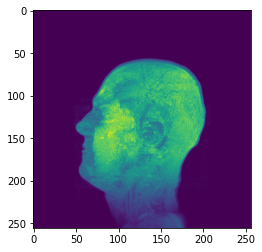

In [4]:
# push it to GPU memory
input_image = cle.push_zyx(np_array)

cle.imshow(input_image)

## Rotation
For rotating an image, you need to provide angles corresponding to axes.

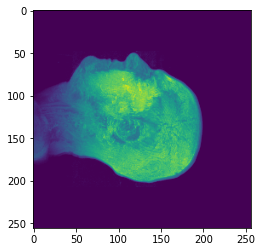

In [5]:
rotated = cle.rotate(input_image, angle_around_z_in_degrees=90)
cle.imshow(rotated)

Images are rotated around their center by default. You can change this by providing an additional parameter. The image will then be rotated around the origin.

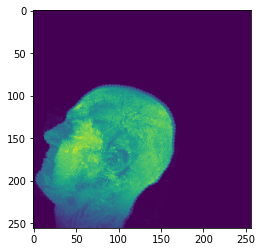

In [6]:
rotated = cle.rotate(input_image, angle_around_z_in_degrees=15, rotate_around_center=False)
cle.imshow(rotated)

## Translation
Images can be translate by providing translation distances along axes:

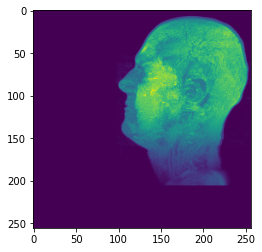

In [7]:
translated = cle.translate(input_image, translate_x=50, translate_y=-50)
cle.imshow(translated)

## Scaling
You can scale the image by providing scaling factors.

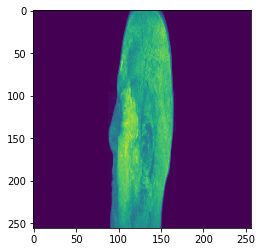

In [8]:
scaled = cle.scale(input_image, factor_x=0.5, factor_y=2)
cle.imshow(scaled)

## Rigid transform
Rigid transforms allow to do translations and rotations in one shot

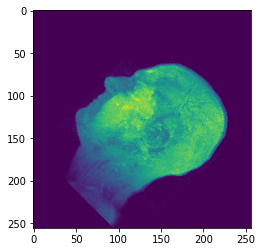

In [9]:
rigid_transformed = cle.rigid_transform(input_image, translate_x=20, angle_around_z_in_degrees=45)
cle.imshow(rigid_transformed)

## Affine transforms
To do translation, rotation and scaling in one shot, use affine transforms. [Shearing will be implemented in a future release](https://github.com/clEsperanto/pyclesperanto_prototype/issues/90).

To setup an affine transform, you can do this using a 4x4 transform matrix:

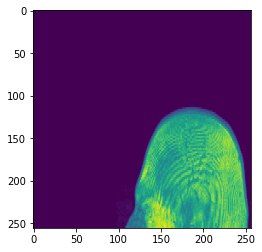

In [10]:
transform_matrix = np.asarray([
    [1, 0, 0, 50],
    [0, 2, 0, 0],
    [0, 0, 0.5, 0],
    [0, 0, 0, 1]
])
transformed_image = cle.affine_transform(input_image, transform=transform_matrix)
cle.imshow(transformed_image)

Alternatively, you can configure a transform object and pass it:

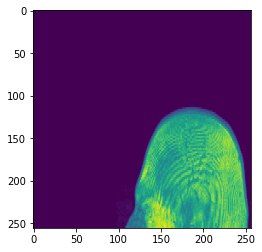

In [11]:
transform = cle.AffineTransform3D()
transform.translate(50)
transform.scale(1, 2, 0.5)

transformed_image = cle.affine_transform(input_image, transform=transform)
cle.imshow(transformed_image)